### Advanced Traffic Analysis Using Computer Vision for Strategic Business Planning

In [2]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import cv2
from PIL import Image, ImageEnhance
from ultralytics import YOLO
from IPython.display import Video
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'numpy'

In [2]:
yolo_model = YOLO('yolov8n.pt') 

In [3]:
def augment_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply augmentations
    image = cv2.flip(image, 1)  # Horizontal flip
    brightness = ImageEnhance.Brightness(Image.fromarray(image)).enhance(1.2)  # Brightness adjustment
    contrast = ImageEnhance.Contrast(brightness).enhance(1.2)  # Contrast enhancement
    
    return np.array(contrast)

In [4]:
# Configure seaborn for visualization
sns.set_theme(style="whitegrid", palette="pastel")

In [5]:
# Load YOLO model for vehicle detection and classification
yolo_model = YOLO('yolov8n.pt')

In [6]:
dataset_path = 'Vehicle_Detection_Image'
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load dataset configuration
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)
    print(yaml.dump(yaml_content, default_flow_style=False))

# Define image paths
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Function to analyze dataset statistics
def get_image_stats(image_path):
    count = 0
    image_sizes = set()
    for filename in os.listdir(image_path):
        if filename.endswith(('.jpg', '.png')):
            count += 1
            with Image.open(os.path.join(image_path, filename)) as img:
                image_sizes.add(img.size)
    return count, image_sizes

num_train_images, train_image_sizes = get_image_stats(train_images_path)
num_valid_images, valid_image_sizes = get_image_stats(valid_images_path)




names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: ../train/images
val: ../valid/images



In [7]:
print(f"Training Images: {num_train_images}, Unique Sizes: {train_image_sizes}")
print(f"Validation Images: {num_valid_images}, Unique Sizes: {valid_image_sizes}")

Training Images: 536, Unique Sizes: {(640, 640)}
Validation Images: 90, Unique Sizes: {(640, 640)}


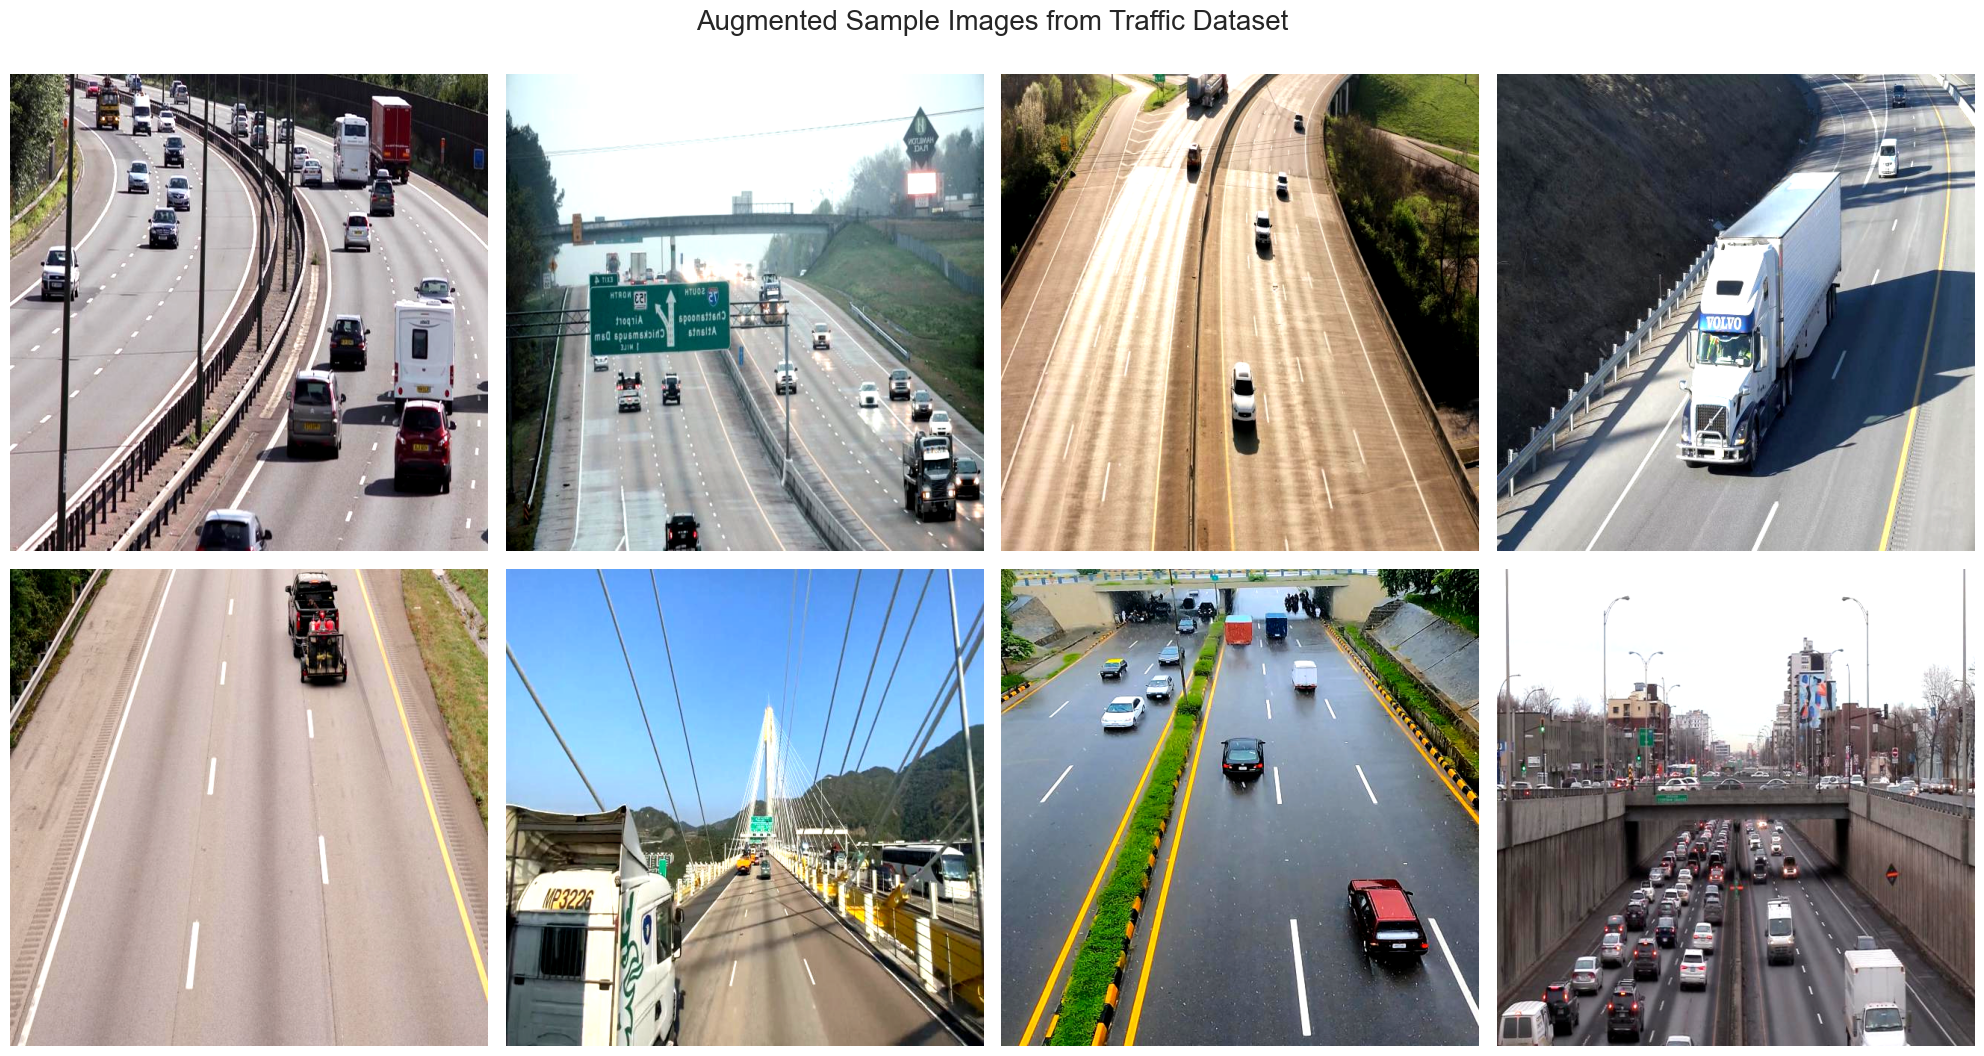

In [8]:
# Select representative images for visualization
image_files = [file for file in os.listdir(train_images_path) if file.endswith(('.jpg', '.png'))]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, max(1, num_images // 8))][:8]

# Display selected images
fig, axes = plt.subplots(2, 4, figsize=(20, 11))
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = augment_image(img_path)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Augmented Sample Images from Traffic Dataset', fontsize=20)
plt.tight_layout()
plt.show()
